In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# akış ve uzaklık matrikslerinin oluşturulması
dist = [
    [0, 1, 1, 2, 3],
    [1, 0, 2, 1, 2],
    [1, 2, 0, 1, 2],
    [2, 1, 1, 0, 1],
    [3, 2, 2, 1, 0]
]

flow = [
    [0, 5, 2, 4, 1],
    [5, 0, 3, 0, 2],
    [2, 3, 0, 0, 0],
    [4, 0, 0, 0, 5],
    [1, 2, 0, 5, 0]
]

# np arrayine dönüştürme 
flow = np.array(flow)
dist = np.array(dist)

In [3]:
# maaliyet fonksiyonu
def cost(matrix, flow=flow, dist=dist):
    cost = flow*dist
    return np.sum(cost)

# önerilen çözümün maaliyeti
def solution_cost(solution, flow=flow, dist=dist):
    cost = flow[np.ix_(solution, solution)]*dist
    return np.sum(cost)
    

In [4]:
# yeni çözüm önerileri üretiliyor

# swapping 
def generate_neighbors(current):
    neighbors = np.zeros((10, len(current) +2), dtype=int)
    idx = 0
    for i in range (len(current)):
        j=i+1
        for j in range(len(current)):
            if  i<j:
                # swapping
                current[j], current[i] = current[i], current[j] 
                neighbors[idx, :-2] = current
                neighbors[idx, -2:] = [current[i], current[j]]
                current[i], current[j] = current[j], current[i]
                idx += 1
                
    return neighbors

# yeni önerilerden biri random seçiliyor
def get_neighbor(current):
    return random.choice(generate_neighbors(current))[:-2]
    

In [5]:
# kabul olasılığı
def acceptance_prob(delta, T):
    return np.exp(-delta/T) > random.random()


In [6]:
# başlangıç olarak random bir çözüm
def init_solution():
    return random.sample(range(len(flow)), len(flow))

def simulated_annealing(flow=flow, dist=dist):
    solutions = []
    current = init_solution()
    
    current_cost = solution_cost(current)
    solutions.append(current)
    best_solution = current
    best_cost = solution_cost(best_solution)
    
    
    T = 10000
    T_min = 0.001
    alpha = 0.9
    
    while T > T_min: 
        # yeni çözüm üret
        new_solution = get_neighbor(current)
        new_cost = solution_cost(new_solution)
        solutions.append(new_solution)
        
        # çözümü kabul et ya da etme
        if new_cost < current_cost | acceptance_prob(new_cost - current_cost, T):
            current = new_solution
            current_cost = solution_cost(current)
        
        # en iyi çözümü elde et
        if current_cost < best_cost:
            best_solution = current
            best_cost = solution_cost(best_solution)
            
        # her iterasyonda sıcaklık güncelleme
        T = T*alpha
        
    return best_solution, solutions


Initial solution:  [2, 5, 4, 3, 1] Initial Cost:  90
After 154 later..
Best Solution: [4, 5, 1, 2, 3] Best Cost: 50


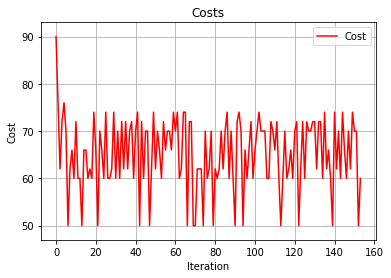

In [7]:
# seed deneylerde aynı randomluk olsun diye
np.random.seed(3)
random.seed(3)

solution, solutions = simulated_annealing()
print("Initial solution: ", [i+1 for i in solutions[0]] , "Initial Cost: ", solution_cost(solutions[0]))
print("After", len(solutions), "later..")
print("Best Solution:", [i+1 for i in solution], "Best Cost:", solution_cost(solution))

costs = [solution_cost(sol) for sol in solutions]
plt.plot(costs, "r", label="Cost")
plt.title("Costs")
plt.legend()
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.ylim((min(costs) - 3, max(costs) + 3))
plt.grid()
plt.show()